In [1]:
from matplotlib import pyplot as plt
from astropy.io import fits
import glob
import numpy as np

In [13]:
lst = glob.glob("darks/*/*raw.fits")

In [17]:
temp= []
s = []
for item in lst:
    file = fits.open(item)
    data = file[1].data
    exptime = file[0].header['EXPTIME']
    s.append(( sum(sum(data))/ exptime )/ (1024 **2))  
    
    temp.append((file[1].header['MDECODT1'] + file[1].header['MDECODT2']) /2 )
    

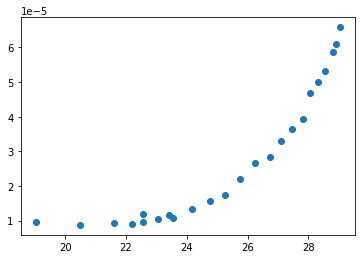

In [18]:
plt.plot(temp, s, 'o')

In [98]:
new_lst = []
for item in lst:
    file = fits.open(item)
    t = (file[1].header['MDECODT1'] + file[1].header['MDECODT2']) /2
    if t <= 25.0: 
        new_lst.append(item)
print(new_lst)
print()
for i in new_lst:
    file = fits.open(i)
    temp = (file[1].header['MDECODT1'] + file[1].header['MDECODT2']) /2
    print(i, 'temp:', temp)

['darks/jelg02pwq/jelg02pwq_raw.fits', 'darks/jelg02ptq/jelg02ptq_raw.fits', 'darks/jelp02vfq/jelp02vfq_raw.fits', 'darks/jelg02psq/jelg02psq_raw.fits', 'darks/jelg02pxq/jelg02pxq_raw.fits', 'darks/jelp02vgq/jelp02vgq_raw.fits', 'darks/jelg02prq/jelg02prq_raw.fits', 'darks/jelp01j4q/jelp01j4q_raw.fits', 'darks/jelg02puq/jelg02puq_raw.fits', 'darks/jelp01j3q/jelp01j3q_raw.fits', 'darks/jelg02pvq/jelg02pvq_raw.fits']

darks/jelg02pwq/jelg02pwq_raw.fits temp: 24.163800000000002
darks/jelg02ptq/jelg02ptq_raw.fits temp: 21.5997
darks/jelp02vfq/jelp02vfq_raw.fits temp: 22.2102
darks/jelg02psq/jelg02psq_raw.fits temp: 20.500799999999998
darks/jelg02pxq/jelg02pxq_raw.fits temp: 24.7743
darks/jelp02vgq/jelp02vgq_raw.fits temp: 23.0649
darks/jelg02prq/jelg02prq_raw.fits temp: 19.035600000000002
darks/jelp01j4q/jelp01j4q_raw.fits temp: 23.5533
darks/jelg02puq/jelg02puq_raw.fits temp: 22.576500000000003
darks/jelp01j3q/jelp01j3q_raw.fits temp: 22.576500000000003
darks/jelg02pvq/jelg02pvq_raw.fits 

In [99]:
wavg_data = np.zeros((1024, 1024))
total_time = 0
for item in lst:
    file = fits.open(item)
    exptime = file[0].header['EXPTIME']
    data = file[1].data
    
    total_time += exptime
    wavg_data += data 
    
print(total_time)
wavg_data_cps_all = wavg_data/total_time

24080.0


In [100]:
wavg_data = np.zeros((1024, 1024))
total_time = 0
for item in new_lst:
    file = fits.open(item)
    exptime = file[0].header['EXPTIME']
    data = file[1].data
    
    total_time += exptime
    wavg_data += data 
    
print(total_time)
wavg_data_cps_lowt = wavg_data/total_time

11080.0


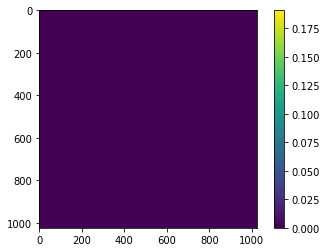

In [104]:
plt.imshow(wavg_data_cps_all )
plt.colorbar()
filename = glob.glob('F150LP/*/*.fits')
file = fits.open(filename[0])
file[1].data = wavg_data_cps_all *624
file.writeto('avg_dark_ps_all.fits', overwrite = True)

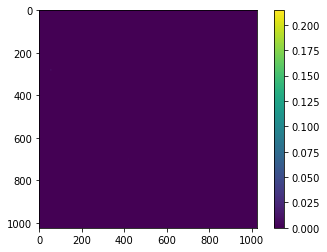

In [105]:
plt.imshow(wavg_data_cps_lowt )
plt.colorbar()
filename = glob.glob('F150LP/*/*.fits')
file = fits.open(filename[0])
file[1].data = wavg_data_cps_lowt *624
file.writeto('avg_dark_ps_lowt.fits', overwrite = True)

In [81]:
filename = glob.glob('F150LP/*/*.fits')
print(filename[10])
file = fits.open(filename[10])
data = file[1].data
data -= wavg_data_cps * file[0].header['EXPTIME']
for i in range(len(data)):
    for j in range(len(data[i])):
        if data[i][j] < 0.0:
            data[i][j] = 0.0
file[1].data = data
file.writeto('a.fits', overwrite = True)
file.close()

F150LP/04/hst_16231_04_acs_sbc_f150lp_jec404gy_flt.fits


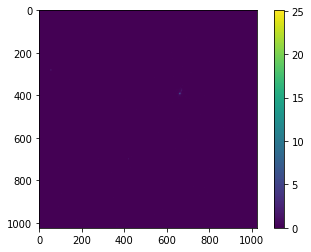

In [76]:
plt.imshow(fits.open(filename[0])[1].data)
plt.colorbar()

In [74]:
file = fits.open(filename[1])
data = 